In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
path = '/home/alejandro/Dropbox/osb_enftransm-covid-19_27092021.csv'

In [3]:
def GetExperiments( N = 100000 ):
    
    freq = np.zeros( N )
    
    for i in range(int(N)):
        
        d1 = np.random.randint(1,7)
        d2 = np.random.randint(1,7)
        
        freq[i] = d1+d2
        
    return freq

In [10]:
freq = GetExperiments(10000)

# Crear un histograma

(array([ 257.,  563.,  875., 1089., 1382., 1687., 1370., 1131.,  812.,
         834.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <a list of 10 Patch objects>)

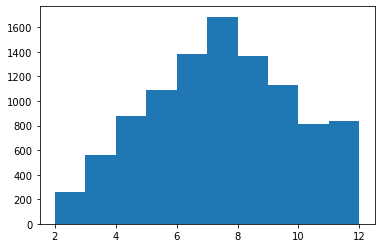

In [19]:
plt.hist(freq)

In [31]:
x = np.linspace(2,13,12)
h, bins = np.histogram(freq, bins=x)
w = np.diff(bins)
x

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

<BarContainer object of 11 artists>

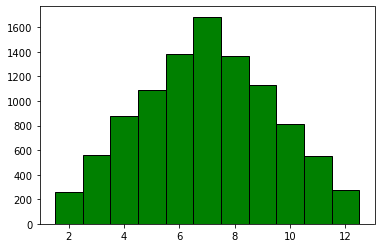

In [21]:
plt.bar( bins[:-1], h, color='g', ec='k', width=w )

In [22]:
# Area del histograma
I = np.sum(w*h); print(I)

10000.0


In [23]:
hnorm = h/I
print(np.sum(w*hnorm))

0.9999999999999999


<BarContainer object of 11 artists>

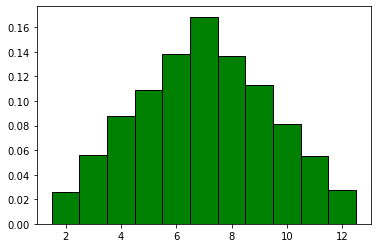

In [24]:
plt.bar( bins[:-1], hnorm, color='g', ec='k', width=w )

In [26]:
hnorm

array([0.0257, 0.0563, 0.0875, 0.1089, 0.1382, 0.1687, 0.137 , 0.1131,
       0.0812, 0.0556, 0.0278])

In [28]:
# Probabilidad de obtener un numero menor o igual a 7
np.sum(hnorm[:6]) 

0.5852999999999999

$$ \bar{X} = (x1+x2+x3)/3 $$ 

In [30]:
u = np.sum(x[:11]*hnorm[:11]) 
print(u)

6.9959999999999996


In [32]:
print(np.sum( hnorm*x[:-1] ))

6.9959999999999996


# Cargar la base de datos

In [147]:
df = pd.read_csv(path,sep=';')

In [148]:
df

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Engativá,22,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado
...,...,...,...,...,...,...,...,...,...,...,...
1449284,1449285,NaN,2021-09-25,Sin dato,Sin dato,17,1,F,En estudio,Casa,Leve
1449285,1449286,NaN,2021-09-26,Sin dato,Sin dato,79,1,M,En estudio,Casa,Leve
1449286,1449287,NaN,2021-09-25,Sin dato,Sin dato,38,1,M,En estudio,Casa,Leve
1449287,1449288,2021-09-09,2021-09-24,Sin dato,Sin dato,21,1,F,En estudio,Casa,Recuperado


In [149]:
mask = (df['FECHA_DIAGNOSTICO'] >= '2020-08-01') & (df['FECHA_DIAGNOSTICO'] <= '2020-08-31') 
#mask

In [164]:
for i in range(1,13):
    year = '2020-{}-01'.format(i)
    print(year)

2020-1-01
2020-2-01
2020-3-01
2020-4-01
2020-5-01
2020-6-01
2020-7-01
2020-8-01
2020-9-01
2020-10-01
2020-11-01
2020-12-01


In [150]:
def GetFilter(df,mask):
    filtered_df = df.loc[mask]
    return filtered_df

In [151]:
df = GetFilter(df,mask)

In [152]:
N = len( df.iloc[:,0] )
print(N)

110001


In [153]:
#n = ['CIUDAD','EDAD']
#df[n]

In [154]:
Counts_Localidad = pd.value_counts(df['LOCALIDAD_ASIS']).sort_index()
Counts_Localidad
Probabilities = Counts_Localidad/N
Probabilities

Antonio Nariño        0.013509
Barrios Unidos        0.022045
Bosa                  0.090508
Chapinero             0.021527
Ciudad Bolívar        0.063063
Engativá              0.131899
Fontibón              0.045663
Fuera de Bogotá       0.006836
Kennedy               0.128053
La Candelaria         0.004491
Los Mártires          0.011745
Puente Aranda         0.043491
Rafael Uribe Uribe    0.046318
San Cristóbal         0.048245
Santa Fe              0.014418
Sin dato              0.012364
Suba                  0.151799
Teusaquillo           0.017891
Tunjuelito            0.023473
Usaquén               0.064863
Usme                  0.037800
Name: LOCALIDAD_ASIS, dtype: float64

# Tablas de contingencia

In [155]:
CrossTab = pd.crosstab( index = df['LOCALIDAD_ASIS'], columns = df['ESTADO'] )
CrossTab

ESTADO,Fallecido,Fallecido (No aplica No causa Directa),Recuperado
LOCALIDAD_ASIS,,,
Antonio Nariño,33,13,1440
Barrios Unidos,60,16,2349
Bosa,197,33,9726
Chapinero,52,10,2306
Ciudad Bolívar,146,31,6760
Engativá,324,92,14093
Fontibón,110,36,4877
Fuera de Bogotá,25,10,717
Kennedy,332,61,13693


In [156]:
Fallecidos_Localidad = CrossTab.Fallecido

In [157]:
#CrossTab.iloc[:,0]

In [158]:
Fallecidos_Localidad

LOCALIDAD_ASIS
Antonio Nariño         33
Barrios Unidos         60
Bosa                  197
Chapinero              52
Ciudad Bolívar        146
Engativá              324
Fontibón              110
Fuera de Bogotá        25
Kennedy               332
La Candelaria           8
Los Mártires           41
Puente Aranda         120
Rafael Uribe Uribe    150
San Cristóbal         137
Santa Fe               46
Sin dato                3
Suba                  324
Teusaquillo            47
Tunjuelito             71
Usaquén               131
Usme                  103
Name: Fallecido, dtype: int64

In [159]:
mean = np.sum( Fallecidos_Localidad*Probabilities )
mean

204.4425414314415

In [160]:
df_fallecidos = df[ df['ESTADO'] == 'Fallecido' ]
CrossTab_f = pd.crosstab( index = df_fallecidos['LOCALIDAD_ASIS'], columns = df_fallecidos['ESTADO'] )

<Figure size 1080x360 with 0 Axes>

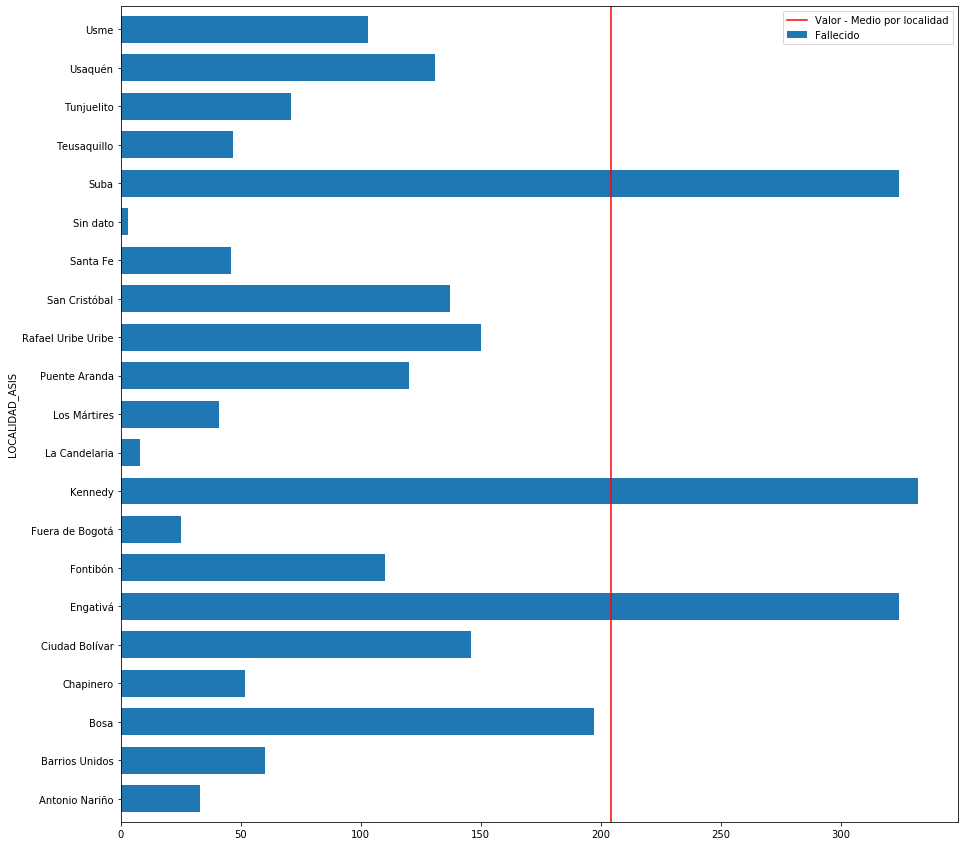

In [161]:
fig = plt.figure(figsize=(15,5))
ax = CrossTab_f.plot(kind='barh',stacked=False, width=0.7, figsize=(15,15))
ax = ax.axvline( x = mean, color='r', label='Valor - Medio por localidad' )
plt.legend(loc=0)

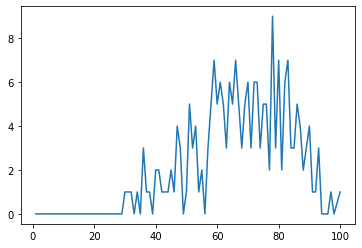

In [142]:
EDAD = pd.crosstab( index = df['EDAD'], columns = df['ESTADO'])
plt.plot(EDAD.Fallecido)

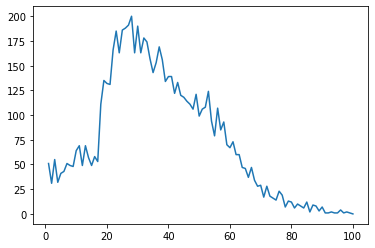

In [143]:
plt.plot(EDAD.Recuperado)